In [1]:
%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from pde_solvers.cn import *
import numpy as np
import matplotlib.pyplot as plt

In [15]:
model_32 = RD_2D_1st_Order(Ds=[0.01, 0.1], N=25000, T=100, Lx=1, Ly=1, Ix=32, Jy=32,
                        #boundary_condition=Neumann_Boundary_2D
                       boundary_condition=Periodic_Boundary_2D
                       #boundary_condition=Diritchlet_Boundary_2D
                       )

model_128 = RD_2D_1st_Order(Ds=[0.01, 0.1], N=25000, T=100, Lx=1, Ly=1, Ix=128, Jy=128,
                        #boundary_condition=Neumann_Boundary_2D
                       boundary_condition=Periodic_Boundary_2D
                       # boundary_condition=Diritchlet_Boundary_2D
                       )

In [16]:
A, B = 4.5, 13.29
def Brusselator1(u,v):    
    u2 = u**2
    u2v = u2 * v
    return A - (B + 1) * u + u2v
    
def Brusselator2(u,v):    
    u2 = u**2
    u2v = u2 * v
    return B * u - u2v

def kinetics(u,v):    
    u2 = u**2
    u2v = u2 * v
    return (A - (B + 1) * u + u2v, B * u - u2v)

U_32 = np.random.normal(scale=.1, size=(model_32.Ix*model_32.Jy))
U_32 += A
V_32 = np.random.normal(scale=.1, size=(model_32.Ix*model_32.Jy))
V_32 += B/A

U_128 = np.random.normal(scale=.1, size=(model_128.Ix*model_128.Jy))
U_128 += A
V_128 = np.random.normal(scale=.1, size=(model_128.Ix*model_128.Jy))
V_128 += B/A

# U_32 = np.array([[np.mean(U_128.reshape((129,129))[i:i+4, j:j+4]) 
#                   for i in range(0,129,4)]
#                   for j in range(0,129,4)]).flatten()

# V_32 = np.array([[np.mean(V_128.reshape((129,129))[i:i+4, j:j+4]) 
#                   for i in range(0,129,4)]
#                   for j in range(0,129,4)]).flatten()

In [22]:
res_32 = model_32.integrate([U_32,V_32],kinetics, 1)

In [18]:
res_128 = model_128.integrate([U_128,V_128],kinetics, 1)

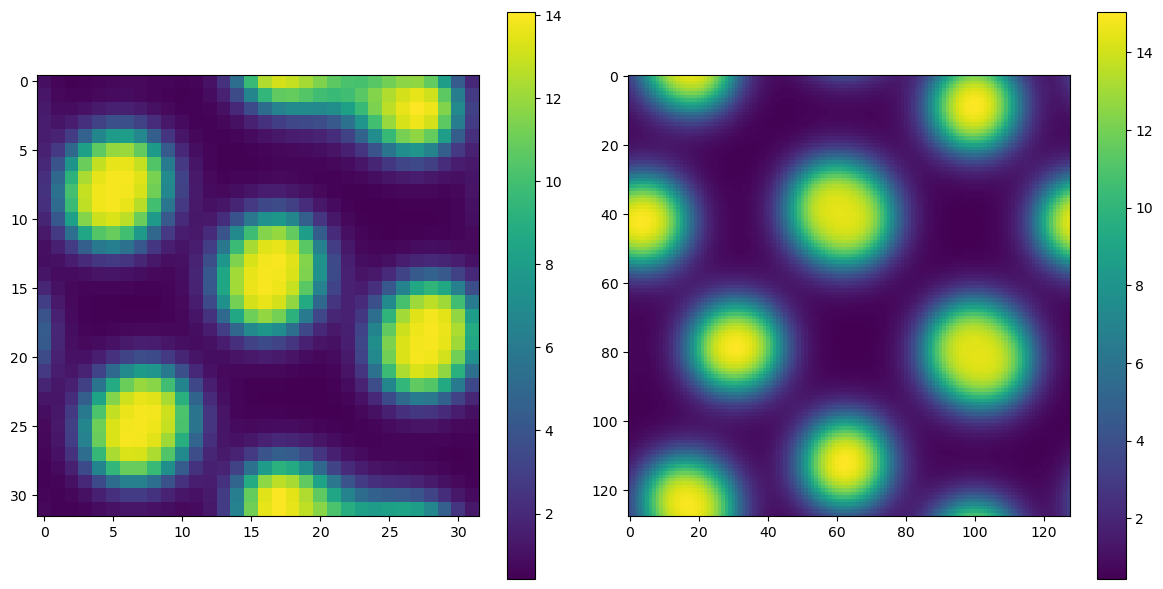

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow((res_32[-1, 0, :]).reshape(model_32.Ix, model_32.Jy))
plt.colorbar()
plt.subplot(122)
plt.imshow((res_128[-1, 0, :]).reshape(model_128.Ix, model_128.Jy))
plt.colorbar()
plt.tight_layout()
plt.show()